# Build knowledge-graph-from-keywords

In [ ]:
Step 7 show how to access the relationships between selected keywords, and show it as a knowledge graph. 

In [11]:
#hide
import gensim
from gensim.summarization.keywords import get_graph
import networkx as nx
import matplotlib.pyplot as plt #note a different module imported from matplotlib
# Note that Smart_open.gcs may not import successfully depending on Gensim set up. This doesnt matter. 

# Open the interim results folder

In [12]:
#hide
import os
directory= "/Users/lawrence/Documents/GitHub/Data-Model-for-Project-Frameworks/Project-frameworks-by-using-NLP-with-Python-libraries/Interim-results/"
# Change directory location for your particular set-up.

with open(os.path.join(directory,'Corpus_as_one_string.txt')) as f:
    Corpus_as_one_string=f.read()
    f.close()

In [20]:
h.edges()[20:30]

[('pdf', 'principl'),
 ('pdf', 'guidanc'),
 ('pdf', 'regulatori'),
 ('pdf', 'manag'),
 ('pdf', 'licens'),
 ('pdf', 'instal'),
 ('pdf', 'consult'),
 ('pdf', 'sap'),
 ('pdf', 'existreactorseptemb'),
 ('pdf', 'wgwdstoragreportfinal')]

In [13]:
Graph_for_whole_corpus=get_graph(Corpus_as_one_string)
h=Graph_for_whole_corpus

In [ ]:
#hide
# Explore this graph object
h.edges()[20:30]
h.nodes()[0:5]
len(h.nodes())
sorted(h.nodes())[0:5]
h.neighbors("consult")
h.edge_weight(('pdf', 'principl'))

In [ ]:
h.neighbors("oper")

In Step 6 we identified the specific keywords we were interested in.we have already dropped synonyms.

Now we also ignore ONR and 'include' as unhelpful. 

This leaves us with **safety, design, requires, operate, appropriate, process, secure and site**

The get_graph API contains all (stemmed) words, from which these keywords have been drawn

This leaves us with 'safe',  'requir','includ','design','site','secur','process','appropri','oper'

In [21]:
all_node_nx_graph = nx.Graph()
all_node_nx_graph=all_node_nx_graph.to_undirected() #my addition
for edge in h.edges():
    
    all_node_nx_graph.add_node(edge[0])
    all_node_nx_graph.add_node(edge[1])
    all_node_nx_graph.add_weighted_edges_from([(edge[0], edge[1], h.edge_weight(edge))])

    #h.edge_weight(edge) # is this right ?

In [22]:
Graph_only_top_nodes=all_node_nx_graph.subgraph(['safe', 'onr', 'requir','includ','design','site','secur','process','appropri','oper'])

In [23]:
Graph_only_top_nodes.nodes()

NodeView(('site', 'onr', 'appropri', 'safe', 'secur', 'process', 'requir', 'design', 'includ', 'oper'))

In [24]:
all_node_nx_graph.remove_nodes_from([n for n in all_node_nx_graph if n not in set(['safe', 'onr', 'requir','includ','design','site','secur','process','appropri','oper'])])

In [25]:
all_node_nx_graph.nodes()

NodeView(('onr', 'requir', 'design', 'site', 'includ', 'secur', 'appropri', 'oper', 'process', 'safe'))

In [26]:
#hide
#use this if problems between module names -->    if __name__=="__main__":

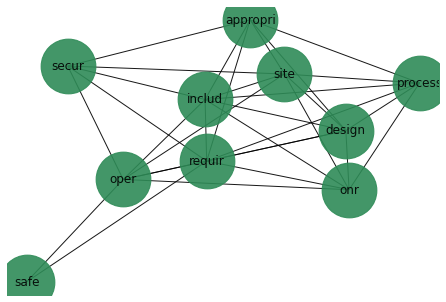

In [27]:
pos = nx.spring_layout(Graph_only_top_nodes)
plt.figure()
nx.draw(all_node_nx_graph, pos, edge_color='black', width=1, linewidths=1,node_size=3000, node_color='seagreen', alpha=0.9,labels={node: node for node in Graph_only_top_nodes.nodes()})
plt.axis('off')
plt.show()

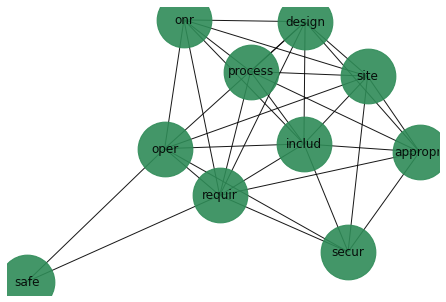

In [28]:
pos = nx.spring_layout(all_node_nx_graph)
plt.figure()
nx.draw(all_node_nx_graph, pos, edge_color='black', width=1, linewidths=1,node_size=3000, node_color='seagreen', alpha=0.9,labels={node: node for node in Graph_only_top_nodes.nodes()})
plt.axis('off')
plt.show()

In [ ]:
# Acknowledgements
For : https://dev.to/b_dmarius/python-keywords-extraction-machine-learning-project-series-part-2-2bii